In [2]:
# import your code
from encoder import encode, header_bits
from decoder import decode
import numpy as np
import matplotlib.pyplot as plt
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
X, _ = load_mat_img('lighthouse.mat', img_info='X')

In [5]:
from scipy.optimize import minimize_scalar

def compress_to_bit(X, required_bits, s=1.31):
    def objective(quant_size):
        vlc, _ = encode(X, quant_size, s=s)
        bits = vlc[:, 1].sum()
        #return abs(bits - required_bits)
        if bits > required_bits:
            return np.abs(bits - (required_bits))**2 * 3  # Soft penalty, preserving the gradient
            #f = np.abs(bits-required_bits)
            #p = 0.001
            #B = 1 / np.abs(bits-required_bits) + (bits > required_bits)*20 # Barrier Function
            #return f - p / B
        else:
            return np.abs(bits - required_bits)

    result = minimize_scalar(objective, bounds=(5, 500), method='bounded')
    quant_size_final = round(result.x, 3)
    vlc, hufftab = encode(X, quant_size_final, s=s)
    return vlc, hufftab, quant_size_final

In [6]:
s0 = 1
s1 = 2
iter = 10
#step = 30
required_bits = 40960
vlc0, headers0,q_size0 = compress_to_bit(X, required_bits, s= s0)
Z0 = decode(vlc0, headers0, q_size0)
vlc1, headers1, q_size1 = compress_to_bit(X, required_bits, s= s1)
Z1 = decode(vlc1, headers1, q_size1)
RMS0 = np.std(Z0 - X)
RMS1 = np.std(Z1 - X)
for i in range(iter):
    s2 = s1 - 0.618 * (s1 - s0) 
    s3 = 0.618 * (s1 - s0) + s0
    vlc2, headers2, q_size2 = compress_to_bit(X, required_bits, s= s2)
    vlc3, headers3, q_size3 = compress_to_bit(X, required_bits, s= s3)
    Z2 = decode(vlc2, headers2, q_size2)
    Z3 = decode(vlc3, headers3, q_size3)
    RMS2 = np.std(Z2 - X)
    RMS3 = np.std(Z3 - X)
    if RMS2 <= RMS0 and RMS2 <= RMS1:
        if RMS2 < RMS3:
            s1 = s3
            RMS1 = RMS3
            q_size1 = q_size3
        elif RMS2 >= RMS3:
            s0 = s2
            RMS0 = RMS2
            q_size0 = q_size2
    elif RMS3 <= RMS0 and RMS3 <= RMS1:
        if RMS2 < RMS3:
            s1 = s3
            RMS1 = RMS3
            q_size1 = q_size3
        elif RMS2 >= RMS3:
            s0 = s2
            RMS0 = RMS2
            q_size0 = q_size2
    else:
        print(s0,s1,s2,s3)
        print(RMS0,RMS1,RMS2,RMS3)
        print(vlc2[:,1].sum())
        print('finished')
        break
    print(s0,s1,s2,s3)
    print(RMS0,RMS1,RMS2,RMS3)
    print(vlc2[:,1].sum())
    
s_list = np.array([s0,s1,s2,s3])
step_list = np.array([q_size0, q_size1, q_size2, q_size3])
idx = np.argmin(s_list)
s = s_list[idx]
step = step_list[idx]
vlc, headers = encode(X, step, s = s)
print(vlc[:,1].sum())
        

1 1.6179999999999999 1.3820000000000001 1.6179999999999999
10.589001434231584 12.057131154226143 8.653969321182709 12.057131154226143
40961
1 1.381924 1.236076 1.381924
10.589001434231584 8.657500029626968 8.401693818905894 8.657500029626968
40954
1.145894968 1.381924 1.145894968 1.236029032
8.985193365896931 8.657500029626968 8.985193365896931 8.403624345372862
40957
1.236058058224 1.381924 1.236058058224 1.2917609097759999
8.401693818905894 8.657500029626968 8.401693818905894 8.39707079860298
40954
1.236058058224 1.381924 1.291778847982432 1.326203210241568
8.401693818905894 8.657500029626968 8.404777119400382 8.5941632385342
40947
finished
42334


In [7]:
Z = decode(vlc, headers, step)

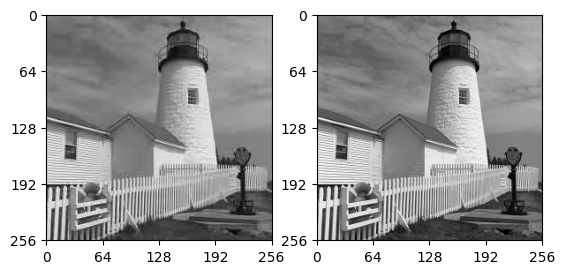

In [8]:
fig, axs = plt.subplots(1,2)
plot_image(Z, ax = axs[0])
plot_image(X, ax = axs[1])

In [9]:
RMS = np.std(Z - X)
s = s_list[idx]
print(vlc[:,1].sum())

42334


In [10]:
print(s, RMS)

1.236058058224 8.064841541189235
